In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("../datasets/Digital-Payment-Fraud.csv")

In [3]:
df.head()

,transaction_id,user_id,transaction_amount,transaction_type,payment_mode,device_type,device_location,account_age_days,transaction_hour,previous_failed_attempts,avg_transaction_amount,is_international,ip_risk_score,login_attempts_last_24h,fraud_label
0,T1,U3756,18758.28,Transfer,UPI,Web,Hyderabad,895,14,1,25535.84,0,0.718,4,0
1,T2,U7899,47538.18,Payment,Wallet,iOS,Hyderabad,918,21,0,3955.85,0,0.525,9,0
2,T3,U1765,36613.10,Payment,Card,Android,Chennai,1506,8,4,22727.71,0,0.985,9,0
3,T4,U8850,29952.99,Payment,Wallet,iOS,Chennai,800,1,3,18095.89,0,0.797,2,0
4,T5,U9049,7843.13,Payment,UPI,Web,Delhi,301,4,1,9317.49,1,0.468,1,0


In [4]:
df.describe()

,transaction_amount,account_age_days,transaction_hour,previous_failed_attempts,avg_transaction_amount,is_international,ip_risk_score,login_attempts_last_24h,fraud_label
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,24813.534161,1006.904533,11.435867,2.013600,15129.061027,0.100667,0.505026,4.995067,0.065200
std,14434.742371,575.632925,6.950899,1.421578,8597.760720,0.300907,0.289647,2.593879,0.246895
min,50.580000,10.000000,0.000000,0.000000,102.790000,0.000000,0.000000,1.000000,0.000000
25%,12272.785000,502.750000,5.000000,1.000000,7725.842500,0.000000,0.257000,3.000000,0.000000
50%,24715.550000,1018.000000,11.000000,2.000000,15074.810000,0.000000,0.502000,5.000000,0.000000
75%,37288.375000,1505.000000,18.000000,3.000000,22573.062500,0.000000,0.759000,7.000000,0.000000
max,49985.900000,1999.000000,23.000000,4.000000,29994.290000,1.000000,1.000000,9.000000,1.000000


In [5]:
df.count()

transaction_id              7500
user_id                     7500
transaction_amount          7500
transaction_type            7500
payment_mode                7500
device_type                 7500
device_location             7500
account_age_days            7500
transaction_hour            7500
previous_failed_attempts    7500
avg_transaction_amount      7500
is_international            7500
ip_risk_score               7500
login_attempts_last_24h     7500
fraud_label                 7500
dtype: int64

In [6]:
df.notna().sum()
print(df.isnull().sum())

transaction_id              0
user_id                     0
transaction_amount          0
transaction_type            0
payment_mode                0
device_type                 0
device_location             0
account_age_days            0
transaction_hour            0
previous_failed_attempts    0
avg_transaction_amount      0
is_international            0
ip_risk_score               0
login_attempts_last_24h     0
fraud_label                 0
dtype: int64


In [7]:
print(df["transaction_type"].value_counts())
print()
print(df["payment_mode"].value_counts())
print()
print(df["device_location"].value_counts())

transaction_type
Payment       2511
Withdrawal    2499
Transfer      2490
Name: count, dtype: int64

payment_mode
Card          1912
UPI           1874
NetBanking    1862
Wallet        1852
Name: count, dtype: int64

device_location
Hyderabad    1614
Bangalore    1518
Chennai      1468
Mumbai       1464
Delhi        1436
Name: count, dtype: int64


In [8]:

transaction_type_map = {"Payment": 0, "Withdrawal": 1, "Transfer": 2}

payment_mode_map = {"Card": 0, "UPI": 1, "NetBanking": 2, "Wallet": 3}

device_location_map = {"Hyderabad": 0, "Bangalore": 1, "Chennai": 2, "Mumbai": 3, "Delhi": 4}

df["transaction_type"]  = df["transaction_type"].map(transaction_type_map)
df["payment_mode"]      = df["payment_mode"].map(payment_mode_map)
df["device_location"]   = df["device_location"].map(device_location_map)

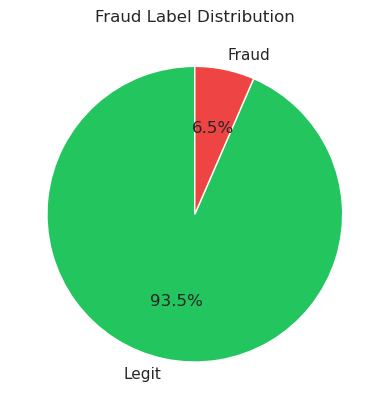

In [9]:
sns.set_theme(style="darkgrid", palette="muted")



plt.figure()
counts = df["fraud_label"].value_counts()
plt.pie(counts, labels=["Legit", "Fraud"], autopct="%1.1f%%",
        colors=["#22c55e", "#ef4444"], startangle=90, wedgeprops=dict(edgecolor="white"))
plt.title("Fraud Label Distribution")
plt.show()


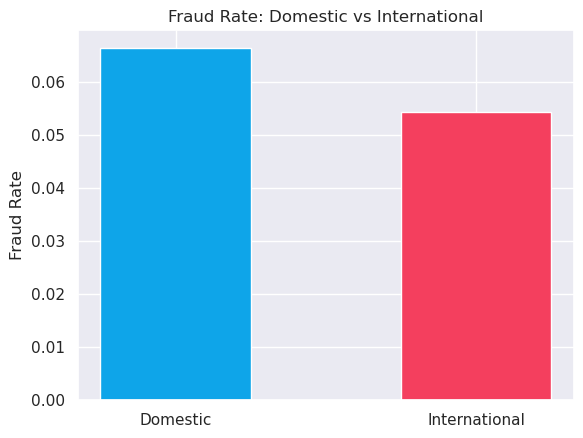

In [10]:
plt.figure()
intl = df.groupby("is_international")["fraud_label"].mean()
plt.bar(["Domestic", "International"], intl.values,
        color=["#0ea5e9", "#f43f5e"], edgecolor="white", width=0.5)
plt.title("Fraud Rate: Domestic vs International")
plt.ylabel("Fraud Rate")
plt.show()

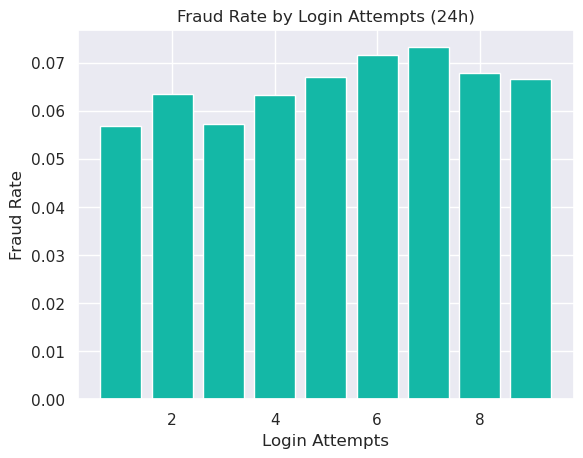

In [11]:
plt.figure()
la = df.groupby("login_attempts_last_24h")["fraud_label"].mean()
plt.bar(la.index, la.values, color="#14b8a6", edgecolor="white")
plt.title("Fraud Rate by Login Attempts (24h)")
plt.xlabel("Login Attempts")
plt.ylabel("Fraud Rate")
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

df = df.dropna()

# Separate classes
#fraud     = df[df["fraud_label"] == 1]
#not_fraud = df[df["fraud_label"] == 0]

#not_fraud_sampled = not_fraud.sample(n=min(int(len(fraud) * 3), len(not_fraud)), random_state=56)
#df = pd.concat([fraud, not_fraud_sampled]).sample(frac=1, random_state=56).reset_index(drop=True)

#print(f"Fraud:     {len(fraud)}")
#print(f"Not Fraud: {len(not_fraud_sampled)}")
#print(f"Total:     {len(df)}")
scaler = StandardScaler()
X = df.drop(["transaction_id", "user_id", "fraud_label", "device_type"], axis=1)
y = df["fraud_label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=56, test_size=0.4)
X_train, y_train = SMOTE(random_state=42).fit_resample(X_train, y_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)       

print(df.isnull().sum())

transaction_id              0
user_id                     0
transaction_amount          0
transaction_type            0
payment_mode                0
device_type                 0
device_location             0
account_age_days            0
transaction_hour            0
previous_failed_attempts    0
avg_transaction_amount      0
is_international            0
ip_risk_score               0
login_attempts_last_24h     0
fraud_label                 0
dtype: int64


In [13]:
print(df.count())
df.notna().count()

transaction_id              7500
user_id                     7500
transaction_amount          7500
transaction_type            7500
payment_mode                7500
device_type                 7500
device_location             7500
account_age_days            7500
transaction_hour            7500
previous_failed_attempts    7500
avg_transaction_amount      7500
is_international            7500
ip_risk_score               7500
login_attempts_last_24h     7500
fraud_label                 7500
dtype: int64


transaction_id              7500
user_id                     7500
transaction_amount          7500
transaction_type            7500
payment_mode                7500
device_type                 7500
device_location             7500
account_age_days            7500
transaction_hour            7500
previous_failed_attempts    7500
avg_transaction_amount      7500
is_international            7500
ip_risk_score               7500
login_attempts_last_24h     7500
fraud_label                 7500
dtype: int64

In [21]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     "C":        [0.001, 0.01, 0.1, 1, 10, 100],
#     "l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9]
# }

# log_reg = LogisticRegression(
#     class_weight="balanced",
#     random_state=56,
#     penalty="elasticnet",
#     max_iter=2000,
#     solver="saga"
# )

# grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring="f1", n_jobs=-1)
# grid_search.fit(X_train_scaled, y_train)

# print("Best params:", grid_search.best_params_)
# print("Best F1:    ", grid_search.best_score_)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_neighbors": [3,4, 6],         
    "weights":     ["uniform"],              
    "metric":      ["manhattan", "chebyshev", "minkowski"],
    "p":           [1],             
    "leaf_size":   [10]
}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring="f1", n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
print("Best params:", grid_search.best_params_)
print("Best F1:    ", grid_search.best_score_)


Best params: {'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}
Best F1:     0.8798388072739549


In [22]:
grid_search.score(X_test, y_test)

/opt/anaconda/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.0

In [23]:
# y_pred = log_reg.predict(X_test) 
# y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]
y_pred = grid_search.predict(X_test) 
y_prob = grid_search.predict_proba(X_test_scaled)[:, 1]


/opt/anaconda/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97      2804
           1       0.00      0.00      0.00       196

    accuracy                           0.93      3000
   macro avg       0.47      0.50      0.48      3000
weighted avg       0.87      0.93      0.90      3000



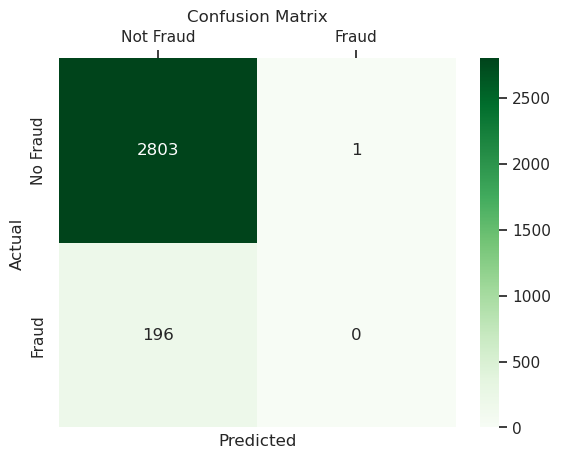

In [25]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Not Fraud", "Fraud"],
            yticklabels=["No Fraud", "Fraud"])
ax.xaxis.tick_top()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [26]:
from sklearn.metrics import average_precision_score, roc_auc_score
print(roc_auc_score(y_test, y_prob))
print(average_precision_score(y_test, y_prob))

0.4965919677428746
0.06767782332547352


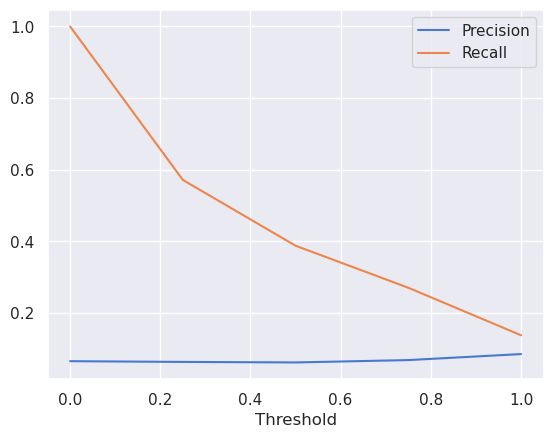

In [27]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.show()

best_thresh = thresholds[np.argmax(recalls >= 0.85)]